<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 02 - Preprocessing
</div>

## Import

In [260]:
import os
import sys
import json
import ast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

## Exploring data

### Combine raw data into dataframes for both video and comment sections

In [261]:
raw_data_path = '../data/raw/'

with open('../data/external/channel_id_Phuc.json', 'r') as file:
    channel_id_phuc = json.load(file)

with open('../data/external/channel_id_nam.json', 'r') as file:
    channel_id_nam = json.load(file)

list_df_videos = []
list_df_comments = []

for channel, id in channel_id_phuc.items():
    list_df_videos.append(pd.read_csv(raw_data_path + channel + '_videos.csv'))
    list_df_comments.append(pd.read_csv(raw_data_path + channel + '_comments.csv', lineterminator = '\n'))

for channel, id in channel_id_nam.items():
    list_df_videos.append(pd.read_csv(raw_data_path + channel + '_videos.csv'))
    list_df_comments.append(pd.read_csv(raw_data_path + channel + '_comments.csv', lineterminator = '\n'))

    
df_videos = pd.concat(list_df_videos, ignore_index = True)
df_comments = pd.concat(list_df_comments, ignore_index = True)

In [262]:
df_videos.head()

,video_id,title,published,view_count,like_count,comment_count,duration,definition,tags,default_audio_language,madeforkid,channel_id,channelTitle
0,hh6gE0LxfO8,"#5 Machine Learning Specialization [Course 1, ...",2022-12-01T13:21:30Z,30742,319.0,6.0,PT7M17S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
1,_i3aqgKVNQI,C5W3L01 Basic Models,2018-02-05T19:50:14Z,110835,436.0,12.0,PT6M19S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
2,uvTL1N02f04,"#23 Machine Learning Specialization [Course 1,...",2022-12-01T13:22:38Z,11639,107.0,4.0,PT6M53S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
3,H4YK_7MAckk,ChatGPT Prompt Engineering for Developers: A s...,2023-04-27T14:49:09Z,143057,2847.0,121.0,PT1M58S,hd,"['ChatGPT', 'prompt engineering', 'openai', 'd...",en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
4,YVtP5UGdgXg,"#25 Machine Learning Specialization [Course 1,...",2022-12-01T13:22:45Z,11542,106.0,1.0,PT6M35S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI


In [263]:
df_comments.head()

,Comment_id,author,Reply_for,Type,video_id,total_reply,like_count,published_at,textdisplay,updatedat
0,Ugw5fySq5NxfwgCuFhB4AaABAg,@AiexpertRajivVerma,NaN,1.0,H_8ZVRRtiIA,0.0,0.0,2023-12-11T01:11:19Z,Sir thank you love love 💕❤️❤❤️❤❤❤❤❤❤ you for f...,2023-12-11T01:11:19Z
1,Ugw_73FC0tI1B6PW9nh4AaABAg,@hamasali8764,NaN,1.0,bZwkaVnhEo4,0.0,0.0,2023-07-27T16:54:52Z,Best One🎉,2023-07-27T16:54:52Z
2,Ugx1qnyHmXF9-BjhIWR4AaABAg,@R0H00,NaN,1.0,hkOosfWxBK4,0.0,1.0,2023-11-18T02:51:01Z,"Hi, I&#39;m a clinician who is working in the ...",2023-11-18T02:51:01Z
3,UgyNZvEu-Ht9ZlLwOXp4AaABAg,@nitinsnoisepollution6293,NaN,1.0,hkOosfWxBK4,0.0,0.0,2023-11-17T20:39:13Z,Superb 🎉❤,2023-11-17T20:39:13Z
4,UgzAxiiLaxyBHEcRw0R4AaABAg,@REDBONDYT,NaN,1.0,Fxq6vjJwX3o,0.0,1.0,2023-07-30T12:36:13Z,Very informative 😃😺,2023-07-30T12:36:13Z


#### Overview

In [264]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5879 entries, 0 to 5878
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                5879 non-null   object 
 1   title                   5879 non-null   object 
 2   published               5879 non-null   object 
 3   view_count              5879 non-null   int64  
 4   like_count              5829 non-null   float64
 5   comment_count           5873 non-null   float64
 6   duration                5879 non-null   object 
 7   definition              5879 non-null   object 
 8   tags                    5064 non-null   object 
 9   default_audio_language  5498 non-null   object 
 10  madeforkid              5879 non-null   bool   
 11  channel_id              5879 non-null   object 
 12  channelTitle            5879 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(9)
memory usage: 557.0+ KB


In [265]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135996 entries, 0 to 135995
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Comment_id    135996 non-null  object 
 1   author        135994 non-null  object 
 2   Reply_for     31094 non-null   object 
 3   Type          135996 non-null  float64
 4   video_id      135996 non-null  object 
 5   total_reply   135996 non-null  float64
 6   like_count    135996 non-null  float64
 7   published_at  135996 non-null  object 
 8   textdisplay   135996 non-null  object 
 9   updatedat     135996 non-null  object 
dtypes: float64(3), object(7)
memory usage: 10.4+ MB


### The size of the datasets

#### Videos section

In [266]:
print('Rows:', df_videos.shape[0])
print('Columns:', df_videos.shape[1])

Rows: 5879
Columns: 13


#### Comments section

In [267]:
print('Rows:', df_comments.shape[0])
print('Columns:', df_comments.shape[1])

Rows: 135996
Columns: 10


### The meaning of each column

**Videos dataset**
- `video_id`: Video ID.
- `title`: Video title.
- `published`: Publication date of the video.
- `view_count`: The video's view count.
- `like_count`: The video's like count.
- `comment_count`: The video's comment count.
- `duration`: How long the video is.
- `definition`: How much information is captured and reproduced (eg. hd, sd).
- `tags`: Tags of the video.
- `default_audio_language`: Default audio language of the video.
- `madeforkid`: Mark if this video is made for kids or not.
- `playlist_title`: Playlist title.
- `channel_id`: The channel ID.
- `channelTitle`: The channel title.

**Comments dataset**
- `Comment_id`: Comment ID.
- `author`: Author of the comment.
- `Reply_for`: The parent comment ID that this comment replied to.
- `Type`: Type of comment (top-level comment (1) or reply(2)).
- `video_id`: The video ID.
- `total_reply`: Total responses to this comment.
- `like_count`: The comment's like count.
- `published_at`: Publication date of the comment.
- `textdisplay`: The content of the comment.
- `updatedat`: The comment's updated date.

### Duplicated rows

#### Videos section

How many duplicated rows do the `df_videos` have?

In [268]:
df_videos.duplicated(subset='video_id').sum()

407

In [269]:
df_videos[df_videos.duplicated(subset='video_id', keep = False)].sort_values(by = 'title').head()

,video_id,title,published,view_count,like_count,comment_count,duration,definition,tags,default_audio_language,madeforkid,channel_id,channelTitle
607,DFDGHEzf5oE,"""Stanford is the easiest to get into with low ...",2019-05-21T02:47:05Z,453056,9855.0,512.0,PT34M33S,hd,"['joma', 'vlog', 'college', 'stanford', 'colle...",en,False,UCV0qA-eDDICsRR9rPcnG7tw,Joma Tech
631,DFDGHEzf5oE,"""Stanford is the easiest to get into with low ...",2019-05-21T02:47:05Z,453055,9855.0,512.0,PT34M33S,hd,"['joma', 'vlog', 'college', 'stanford', 'colle...",en,False,UCV0qA-eDDICsRR9rPcnG7tw,Joma Tech
60,KWULpBYzIYk,"#10 Machine Learning Specialization [Course 1,...",2022-12-01T13:21:47Z,24418,233.0,12.0,PT6M44S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
27,KWULpBYzIYk,"#10 Machine Learning Specialization [Course 1,...",2022-12-01T13:21:47Z,24418,233.0,12.0,PT6M44S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
51,peNRqkfukYY,"#12 Machine Learning Specialization [Course 1,...",2022-12-01T13:21:54Z,21513,256.0,6.0,PT15M47S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI


As we can see, there are some videos that have been collected more than once. We will remove these duplicated rows.

#### Comments section

How many duplicated rows do the `df_comments` have?

In [270]:
df_comments.duplicated().sum()

25587

#### Drop duplicate rows

In [271]:
df_videos = df_videos.drop_duplicates(subset='video_id')
df_comments = df_comments.drop_duplicates()

### Missing values in df_videos

In [272]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472 entries, 0 to 5878
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                5472 non-null   object 
 1   title                   5472 non-null   object 
 2   published               5472 non-null   object 
 3   view_count              5472 non-null   int64  
 4   like_count              5431 non-null   float64
 5   comment_count           5467 non-null   float64
 6   duration                5472 non-null   object 
 7   definition              5472 non-null   object 
 8   tags                    4752 non-null   object 
 9   default_audio_language  5114 non-null   object 
 10  madeforkid              5472 non-null   bool   
 11  channel_id              5472 non-null   object 
 12  channelTitle            5472 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(9)
memory usage: 561.1+ KB


There are 4 columns that have missing values: `like_count`, `comment_count`, `tags`, `default_audio_language`.

When examining videos with missing values in the 'like_count,' it becomes evident that the like count for these videos is hidden by the uploader. Consequently, we have chosen to fill these missing values by utilizing the like ratio of the channel, multiplied by the view count of the video (which does not have missing values).

In [273]:
like_ratio = df_videos.dropna(subset=['like_count'])
like_ratio = like_ratio.groupby('channelTitle')[['view_count', 'like_count']].sum()
like_ratio['like_ratio'] = like_ratio['like_count'] / like_ratio['view_count']


df_videos['like_count'] = df_videos.apply(lambda x: 
                                          x['view_count'] * like_ratio.loc[x['channelTitle'],'like_ratio'] 
                                          if pd.isnull(x['like_count']) 
                                          else x['like_count'], axis=1)

When inspecting videos with missing values in the 'comment_count,' it becomes evident that comments for these videos are disabled by the uploader. Consequently, we have opted to fill these missing values with 0.

In [274]:
df_videos['comment_count'] = df_videos['comment_count'].fillna(0)

tags null because the video uploader does not add tags to the video. So we just leave it as it is.

All channels we chose to scrape have English as their default audio language. As a result, we have chosen to fill in the missing values with 'en'.

In [275]:
df_videos['default_audio_language'] = df_videos['default_audio_language'].fillna('en')

In [276]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472 entries, 0 to 5878
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                5472 non-null   object 
 1   title                   5472 non-null   object 
 2   published               5472 non-null   object 
 3   view_count              5472 non-null   int64  
 4   like_count              5472 non-null   float64
 5   comment_count           5472 non-null   float64
 6   duration                5472 non-null   object 
 7   definition              5472 non-null   object 
 8   tags                    4752 non-null   object 
 9   default_audio_language  5472 non-null   object 
 10  madeforkid              5472 non-null   bool   
 11  channel_id              5472 non-null   object 
 12  channelTitle            5472 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(9)
memory usage: 561.1+ KB


### Fill missing values in df_comments

In [277]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110409 entries, 0 to 135995
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Comment_id    110409 non-null  object 
 1   author        110407 non-null  object 
 2   Reply_for     25166 non-null   object 
 3   Type          110409 non-null  float64
 4   video_id      110409 non-null  object 
 5   total_reply   110409 non-null  float64
 6   like_count    110409 non-null  float64
 7   published_at  110409 non-null  object 
 8   textdisplay   110409 non-null  object 
 9   updatedat     110409 non-null  object 
dtypes: float64(3), object(7)
memory usage: 9.3+ MB


Reply_for is null because the comment is a top-level comment. So we just leave it as it is.

There are only 2 missing values in the `author` column. We can leave it as it is.

### Current column types in datasets

#### Videos section

In [278]:
df_videos.dtypes

video_id                   object
title                      object
published                  object
view_count                  int64
like_count                float64
comment_count             float64
duration                   object
definition                 object
tags                       object
default_audio_language     object
madeforkid                   bool
channel_id                 object
channelTitle               object
dtype: object

The following fields need to be converted to the specified data types:
- `published` to datetime.
- `duration` to timedelta.
- `tags` to a list of strings.

In [279]:
df_videos['published'] =  pd.to_datetime(df_videos['published'])
df_videos['duration'] = pd.to_timedelta(df_videos['duration'])
df_videos['tags'] = df_videos['tags'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)

#### Comments section

In [280]:
df_comments.dtypes

Comment_id       object
author           object
Reply_for        object
Type            float64
video_id         object
total_reply     float64
like_count      float64
published_at     object
textdisplay      object
updatedat        object
dtype: object

The `published_at` and `updatedat` fields need to be converted to datetime.

In [281]:
df_comments['published_at'] =  pd.to_datetime(df_comments['published_at'])
df_comments['updatedat'] =  pd.to_datetime(df_comments['updatedat'])

Next, we will drop columns that are unnecessary for subsequent steps.

In [282]:
df_videos = df_videos.drop(columns = ['channel_id'])
df_comments = df_comments.drop(columns = ['Comment_id'])
df_comments = df_comments.drop(columns = ['Reply_for'])

### Distribution of Values for Numeric Columns

In [283]:
def num_missing_ratio(column):
    return (column.isnull().sum() / len(column) * 100).round(1)

def num_lower_quartile(column):
    return column.quantile(0.25)

def num_median(column):
    return column.quantile(0.5)

def num_upper_quartile(column):
    return column.quantile(0.75)

num_types = ['int64', 'float64']

In [284]:
num_col_info_df_videos = df_videos.select_dtypes(include = num_types)

num_col_info_df_videos = num_col_info_df_videos.agg([num_missing_ratio, 'min', num_lower_quartile, num_median, num_upper_quartile, 'max'])
num_col_info_df_videos

,view_count,like_count,comment_count
num_missing_ratio,0.00,0.00,0.0
min,0.00,0.00,0.0
num_lower_quartile,4047.75,78.75,4.0
num_median,22660.00,483.00,32.0
num_upper_quartile,98793.50,2274.25,138.0
max,19622082.00,1043942.00,26833.0


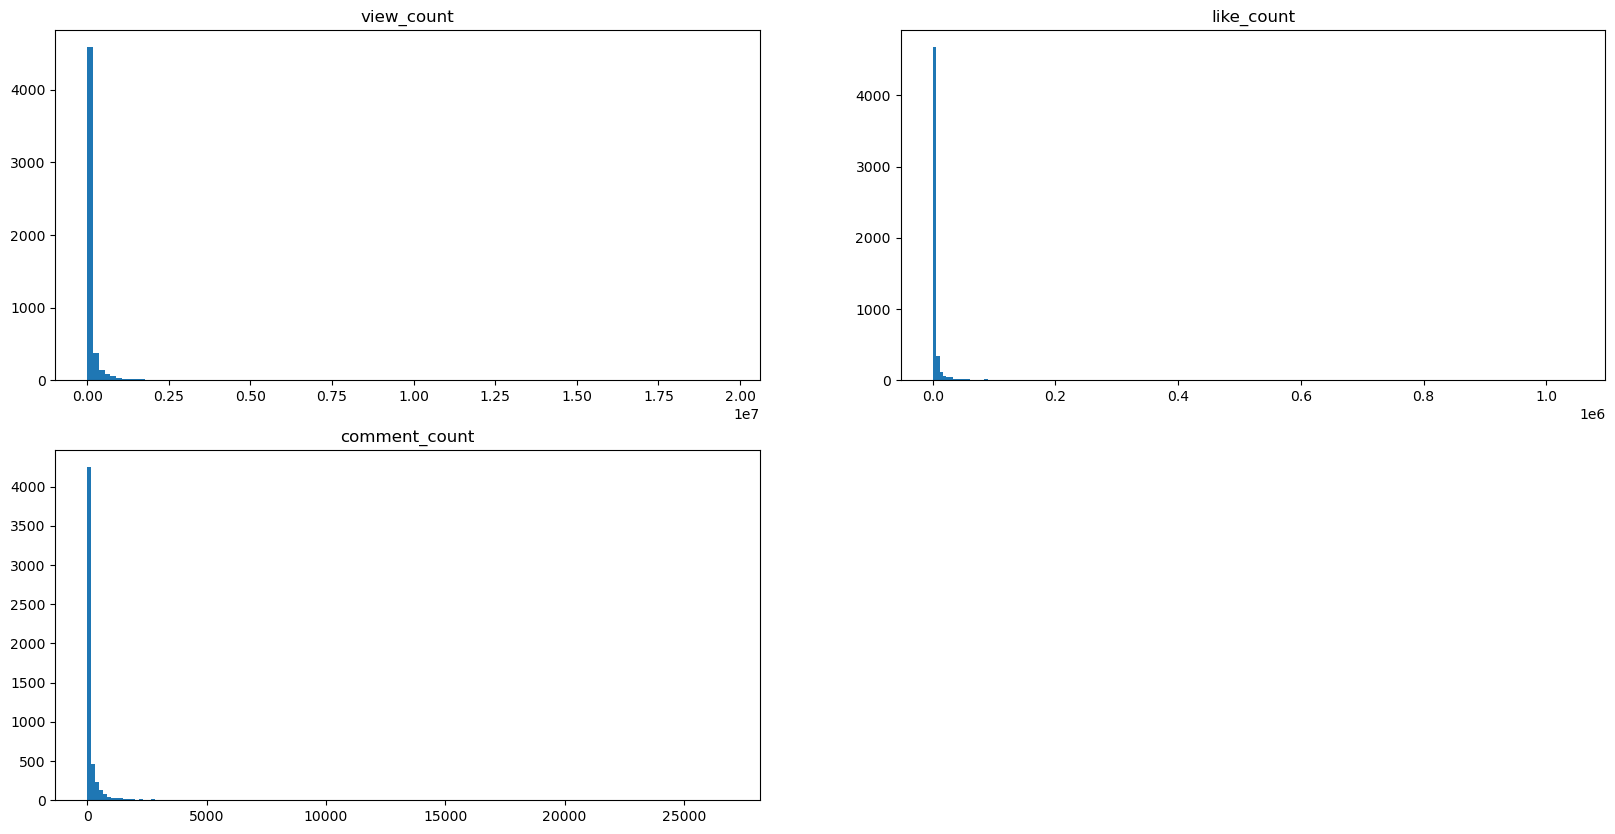

In [285]:
fig = plt.figure(figsize = (20, 10))
for i, col in enumerate(num_col_info_df_videos.columns):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.hist(df_videos[col], bins = 'scott')
    ax.set_title(col)

In [286]:
num_col_info_df_comments = df_comments.select_dtypes(include = num_types)

num_col_info_df_comments = num_col_info_df_comments.agg([num_missing_ratio, 'min', num_lower_quartile, num_median, num_upper_quartile, 'max'])
num_col_info_df_comments

,Type,total_reply,like_count
num_missing_ratio,0.0,0.0,0.0
min,1.0,0.0,0.0
num_lower_quartile,1.0,0.0,0.0
num_median,1.0,0.0,0.0
num_upper_quartile,1.0,0.0,1.0
max,2.0,392.0,65952.0


### Distribution of Values for Non-numeric Columns

In [287]:
def missing_ratio(column):
    return (column.isnull().sum() / len(column) * 100).round(1)

def cat_num_values(column):
    if type(column[0] == 'list'):
        column = column.explode()
    return column.nunique()

def cat_value_ratios(column):
    if type(column[0] == 'list'):
        column = column.explode()
    return column.value_counts(normalize = True).sort_values(axis = 0).to_dict()

In [288]:
cat_cols = ['definition', 'tags', 'default_audio_language', 'madeforkid']
cat_col_info_df_videos = df_videos[cat_cols]

cat_col_info_df_videos = cat_col_info_df_videos.agg([missing_ratio, cat_num_values, cat_value_ratios])
cat_col_info_df_videos

,definition,tags,default_audio_language,madeforkid
missing_ratio,0.0,13.2,0.0,0.0
cat_num_values,2,24347,5,2
cat_value_ratios,"{'sd': 0.023026315789473683, 'hd': 0.976973684...","{'l'hopital's rule': 1.4277555682467162e-05, '...","{'en-GB': 0.0001827485380116959, 'hi': 0.00164...","{True: 0.0021929824561403508, False: 0.9978070..."


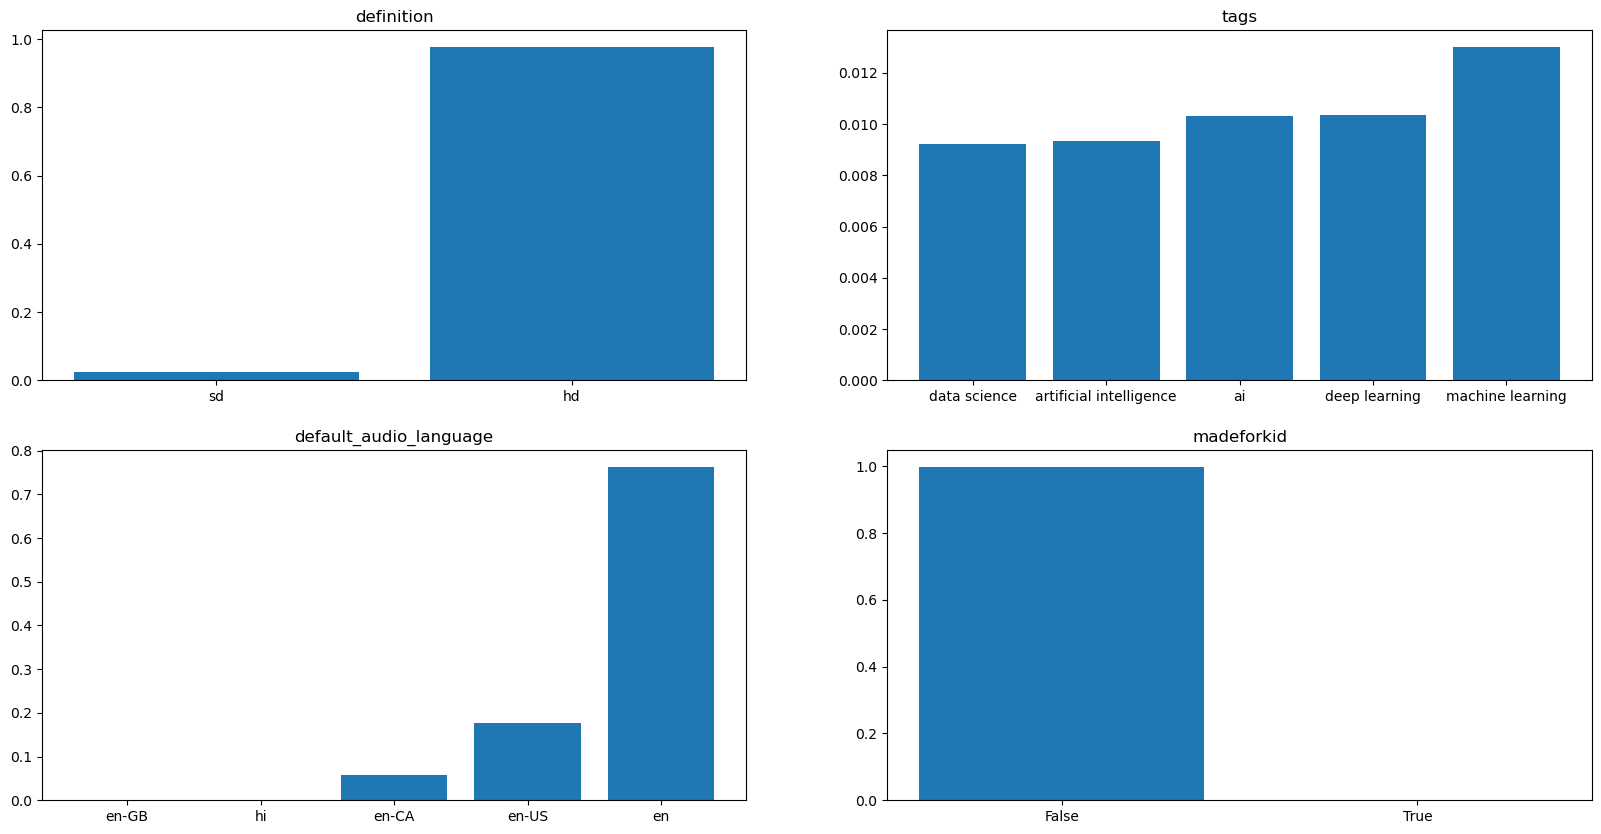

In [289]:
fig = plt.figure(figsize = (20, 10))
for i, col in enumerate(cat_col_info_df_videos.columns):
    ax = fig.add_subplot(2, 2, i + 1)
    n_top = 0
    if col == 'madeforkid':
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['False', 'True'])
    if col == 'tags':
        n_top = 5
    ax.bar(*zip(*list(cat_col_info_df_videos[col]['cat_value_ratios'].items())[-n_top:]))
    ax.set_title(col)

In [290]:
cat_cols = ['author', 'Type']
cat_col_info_df_comments = df_comments[cat_cols]

cat_col_info_df_comments = cat_col_info_df_comments.agg([missing_ratio, cat_num_values, cat_value_ratios])
cat_col_info_df_comments

,author,Type
missing_ratio,0.0,0.0
cat_num_values,75228,2
cat_value_ratios,"{'@erkanp1': 9.057396723033866e-06, '@imarrb80...","{2.0: 0.22793431694879945, 1.0: 0.772065683051..."


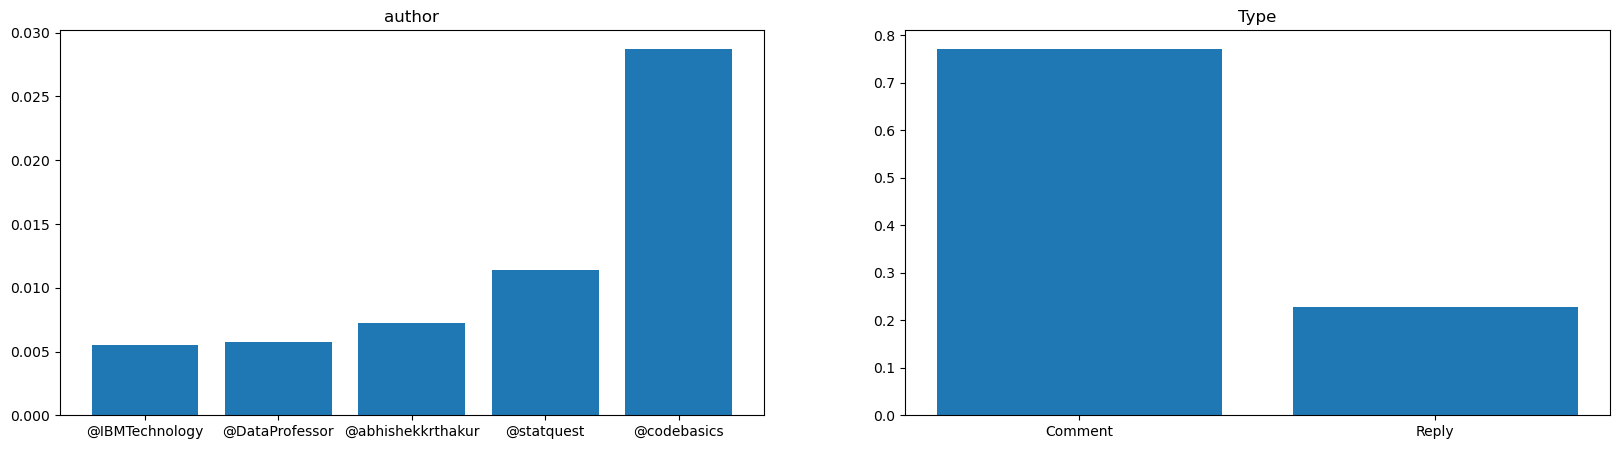

In [291]:
fig = plt.figure(figsize = (20, 5))
for i, col in enumerate(cat_col_info_df_comments.columns):
    ax = fig.add_subplot(1, 2, i + 1)
    n_top = 0
    if col == 'author':
        n_top = 5
    if col == 'Type':
        ax.set_xticks([1, 2])
        ax.set_xticklabels(['Comment', 'Reply'])
    ax.bar(*zip(*list(cat_col_info_df_comments[col]['cat_value_ratios'].items())[-n_top:]))
    ax.set_title(col)

### Save the processed data

In [292]:
processed_data_path = '../data/processed/'

df_videos.to_csv(processed_data_path + 'df_videos_processed.csv', index = False)
df_comments.to_csv(processed_data_path + 'df_comments_processed.csv', index = False)